Use the dataset “Bank_Personal_Loan_Modelling.csv”

1. Store the dataset in your google drive and in Colab file load the dataset from your drive.

In [5]:
# We first stored the dataset in our Google Drive and then loaded it in Colab
import pandas as pd
# from google.colab import drive
# drive.mount("/content/drive")
# ds_PL = pd.read_csv("/content/drive/My Drive/Machine Learning Assignment/Bank_Personal_Loan_Modelling.csv")
ds_PL = pd.read_csv("../datasets/Bank_Personal_Loan_Modelling.csv")

2- Check the shape and head of the dataset.

In [25]:
# We check the number of rows and columns in the dataset and display the first 5 rows
shape = ds_PL.shape
head = ds_PL.head(5)
print("Shape of the dataset:", shape)
head

Shape of the dataset: (5000, 14)


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


3. Age, Experience, Income, CCAvg, Mortgage, Securities are the features and Credit Card
is your Target Variable.

i. Take any 3 features from the six features given above

In [7]:
# We select the features 'Income', 'Experience', and 'CCAvg' and the target variable 'Personal Loan'
# We will use these features to train the model
# We will use the target variable to evaluate the model
# We will also use the target variable to plot a 3D scatter plot
# We will use the target variable to split the dataset into training and testing sets
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report

features = ['Income', 'Experience', 'CCAvg' ]
target = 'Personal Loan'

ii. Store features and targets into a separate variable.

In [8]:
## Storing the features and targets into a separate variable
X = ds_PL[features]
y = ds_PL[target]

iii. Look for missing values in the data, if any, and address them accordingly.


In [9]:
print("\nMissing values:")
print(X.isnull().sum())


Missing values:
Income        0
Experience    0
CCAvg         0
dtype: int64


iv. Plot a 3D scatter plot using Matplotlib.

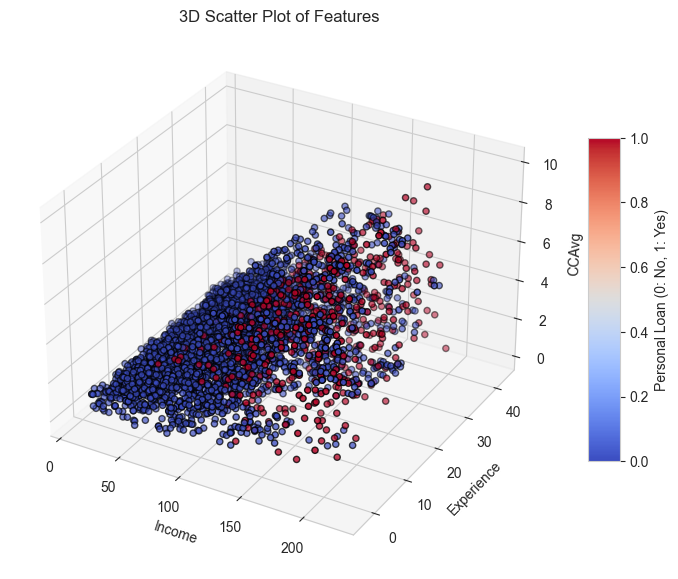

In [10]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X['Income'], X['Experience'], X['CCAvg'], c=y, cmap='coolwarm', edgecolor='k')
ax.set_xlabel('Income')
ax.set_ylabel('Experience')
ax.set_zlabel('CCAvg')
ax.set_title('3D Scatter Plot of Features')
cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Personal Loan (0: No, 1: Yes)')
plt.show()

In [12]:
# Q4. Split the dataset into 80:20. (3 features and 1 target variable)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of train and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (4000, 3) (4000,)
Testing set shape: (1000, 3) (1000,)


In [24]:


# Q5. Train the model using scikit learn SVM API (LinearSVC) by setting the regularization
# parameter C as C = {0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000}.
# i. For each value of C Print the score on test data
# ii. Make the prediction on test data
# iii. Print confusion matrix and classification report

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape, y_train.shape)

# Define regularization parameter values
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

# Train and evaluate models for each C value
predictions = {}
for C in C_values:
    model = LinearSVC(C=C, max_iter=5000, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    predictions[C] = y_pred
    print(f"C = {C} → Accuracy: {accuracy:.4f}")

     # Print confusion matrix and classification report
    print(f"Confusion Matrix for C = {C}:\n{confusion_matrix(y_test, y_pred)}\n")
    print(f"Classification Report for C = {C}:\n{classification_report(y_test, y_pred)}\n")

# # Store predictions for each C value
for C, preds in predictions.items():
    print(f"Predictions for C = {C}: {preds[:10]}")  # Print first 10 predictions

Training set shape: (4000, 3) (4000,)
Best C: 1 with cross-validation accuracy: 0.9042
C = 0.0001 → Accuracy: 0.8910
Confusion Matrix for C = 0.0001:
[[876  19]
 [ 90  15]]

Classification Report for C = 0.0001:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       895
           1       0.44      0.14      0.22       105

    accuracy                           0.89      1000
   macro avg       0.67      0.56      0.58      1000
weighted avg       0.86      0.89      0.87      1000


C = 0.001 → Accuracy: 0.8950
Confusion Matrix for C = 0.001:
[[891   4]
 [101   4]]

Classification Report for C = 0.001:
              precision    recall  f1-score   support

           0       0.90      1.00      0.94       895
           1       0.50      0.04      0.07       105

    accuracy                           0.90      1000
   macro avg       0.70      0.52      0.51      1000
weighted avg       0.86      0.90      0.85      1000


C = 0.01 →

In [26]:
# Q6. Use gridSearchCV a cross-validation technique to find the best regularization
# parameters (i.e.: the best value of C).

# Use GridSearchCV to find the best C value
param_grid = {'C': C_values}
grid_search = GridSearchCV(LinearSVC(max_iter=5000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameter and best score
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_
print(f"Best C: {best_C} with cross-validation accuracy: {best_score:.4f}")

Best C: 1 with cross-validation accuracy: 0.9042
